# Tasca M7 T01

### **Exercicis d'algoritmes de Classificació.**

Primer de tot, procedeixo a obrir, convertir en dataframe, descriure i netejar la base de dades que utilitzaré en aquesta tasca:

In [1]:
# Miro l'arxiu informatiu (WineNames)
print(open('C:/Users/julia/DATA SCIENCE IT/SPRINT 7/wineNames.txt', 'r').read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

És un dataset amb els resultats de l'anàlisi quimic de vins que han crescut a una mateixa regió d'Itàlia però en tres diferents cultius. L'anàlisi químic determina les quantitats que hi ha dels 13 constituents trobats en cadascun dels tres tipus de vins.

In [2]:
# Carrego l'arxiu txt DataFrame de pandas i l'anomeno df
import pandas as pd 

df = pd.read_csv('wineData.txt', index_col=None, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Si mirem el document informatiu, ens diu quins son els atributs, per tant les columnes, i també que hi ha tres tipus de vins (1,2 i 3) classficats sota el nom Class. Amb aquesta informació procedeixo a assignar les columnes al dataframe:

In [3]:
# Assigno les columnes 
df.columns= ['Class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
              'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
              'Proline']
df.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Procedeixo a netejar i descriure la base de dades per tenir-la llesta:

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


Si analitzem les dades, trobem que hi ha 178 mostres en total. Que l'alcohol entre les tres classes de vi no varia gaire, en canvi la quantitat de Proline que contenen els vins (aminoàcid) si, amb una mitjana de 747 i una desviació estandard de 315 aprox. Vaig a investigar una mica les diferencies entre els tres tipus de vins:

In [5]:
df.groupby('Class').mean().T

Class,1,2,3
Alcohol,13.744746,12.278732,13.153750
Malic acid,2.010678,1.932676,3.333750
Ash,2.455593,2.244789,2.437083
Alcalinity of ash,17.037288,20.238028,21.416667
Magnesium,106.338983,94.549296,99.312500
Total phenols,2.840169,2.258873,1.678750
Flavanoids,2.982373,2.080845,0.781458
Nonflavanoid phenols,0.290000,0.363662,0.447500
Proanthocyanins,1.899322,1.630282,1.153542
Color intensity,5.528305,3.086620,7.396250


Si mirem l'alcohol, no determina el tipus de vi, en canvi la quantitat de Proline i de Magnesi si que ens donen mes infomarció sobre quina classe de vi pot ser.

In [6]:
# Miro si hi ha valors nuls
df.isna().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

No hi ha valors nulls

In [7]:
# Verifico si hi ha duplicats
df.duplicated().sum()

0

Tampoc hi ha mostres duplicades

In [8]:
# Mostra el tipus de variables que hi ha en el DataFrame
df.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

Miro la correlació que hi ha entre les variables:

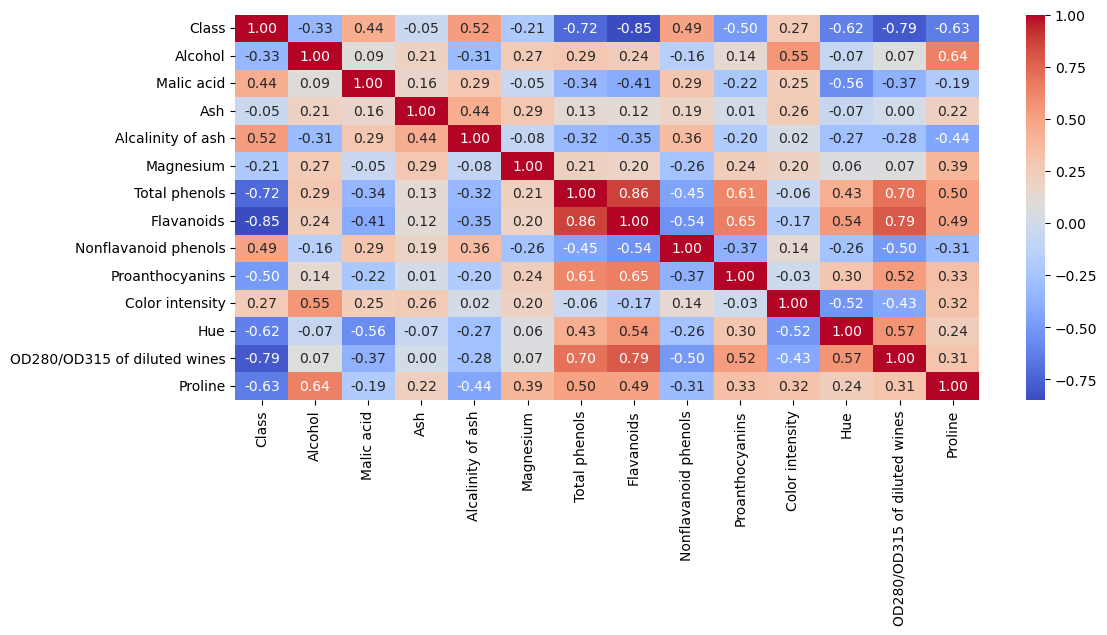

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculo la matriu de correlacio
correlacio = df.corr()

# Creo un mapa de calor amb Seaborn
plt.figure(figsize=(12, 5))
sns.heatmap(correlacio,annot=True,fmt=".2f",cmap='coolwarm')

#Mostro el mapa
plt.show()

Examino la matriu de correlació del conjunt de dades per identificar les relacions entre les variables.

**Observacions:**
- S'observa una correlació positiva molt notable (0.86) entre el contingut total de fenols i els flavonoides.
- Tant els flavonoides com el total de fenols mostren correlacions positives amb el OD280/0D315 del vi diluït, amb coeficients de 0.79 i 0.7, respectivament.
- Les variables "Total phenols", "Flavanoids" i "OD280/OD315 of diluted wines" exhibeixen correlacions negatives amb la classe del vi, amb coeficients de -0.72, -0.85 i -0.79, respectivament.

**Conclusions de l'anàlisi**:

Destaco que les variables "Total phenols", "Flavanoids" i "OD280/OD315 of diluted wines" presenten les correlacions més  significatives amb la variable "Class". Aquestes podrien ser determinants per a una millor classificació del tipus de vi.

## - Exercici 1 i 2
**Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.**

**Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.**

### Divisió de Dades/Splitting Data
Per comprendre el rendiment del model, dividir el conjunt de dades en un conjunt d'entrenament i un conjunt de proves és una bona estratègia.

Divideixo el conjunt de dades utilitzant la funció train_test_split(). S'han de passar 3 paràmetres: *features*, *target*, i *test_set size*. A més, es pot utilitzar random_state per seleccionar registres de manera aleatòria.

In [10]:
# Importo la funció train_test_split 
from sklearn.model_selection import train_test_split

# el target parameter es 'Class' (variable dependent) i la resta de parametres son features (variables independents) 
y = df['Class'] # target
X = df.drop(['Class'], axis = 1) # features

# Divisió del conjunt de dades en training set i test set (70% train i 30% de test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) 


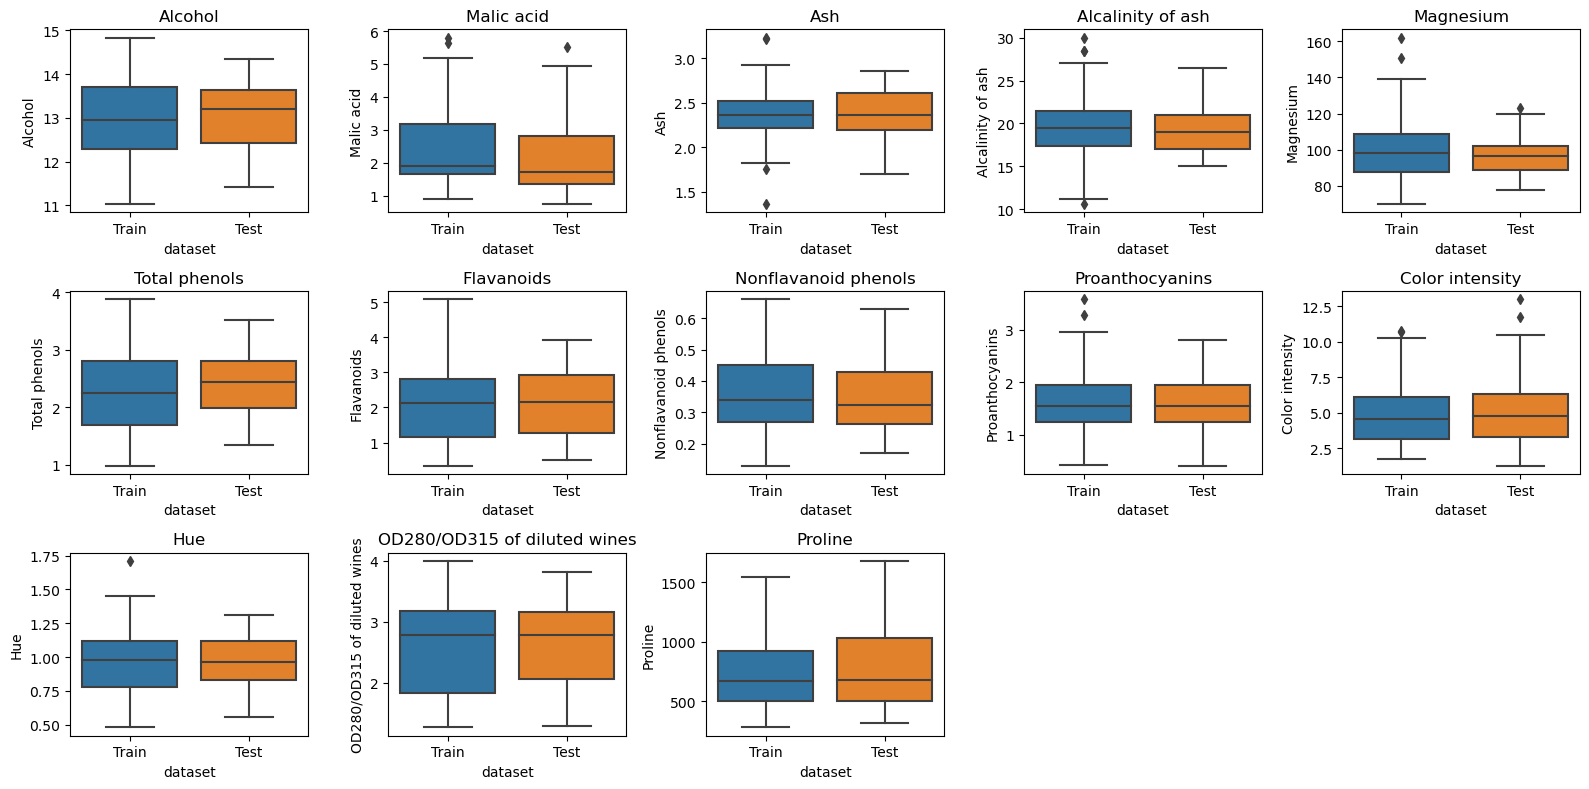

In [11]:
# Boxplots per comparar X_train i X_test
plt.figure(figsize=(16, 8))
for i, feature in enumerate(X.columns):  
    plt.subplot(3, 5, i + 1)
    sns.boxplot(x='dataset', y=feature, data=pd.concat([X_train.assign(dataset='Train'), X_test.assign(dataset='Test')]))
    plt.title(feature)

plt.tight_layout()
plt.show()


Si mirem els boxplots, tenim presencia d'outliers en algunes variables, tant a Train com a Test. (*Els outliers seran tractats en el exercici 5*). Però en general veiem que hi ha una bona distribució dels 2 conjunts.

## Models de Classificació

Els models de classificació que utlitzaré són:
- K-nearest Neighbors (KNN) 
- Support Vector Machines (SVM)

### Classification using K-Nearest Neighbors (KNN)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Creo una instància de la classe KNeighborsClassifier per entrenar el model de KNN
classifier = KNeighborsClassifier()

# Entreno el model KNN amb les dades d'entrenament
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
# Predicció del conjunt X_test amb el model entrenat
y_pred = classifier.predict(X_test)
y_pred

array([3, 1, 3, 1, 2, 1, 3, 3, 2, 1, 3, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       3, 2, 2, 2, 2, 3, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 3, 2, 1, 2, 2, 1,
       2, 1, 3, 2, 3, 1, 2, 1, 1, 3], dtype=int64)

### Accuracy of the model

In [14]:
from sklearn import metrics

# Calculo la accuracy comparant els valors reals (y_test) amb les prediccions (y_pred)
accKNN = metrics.accuracy_score(y_test, y_pred)

print('El accuracy del model K-Nearest Neighbors és:',accKNN)

El accuracy del model K-Nearest Neighbors és: 0.7407407407407407


### KNN Confusion Matrix

              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       0.75      0.71      0.73        21
           3       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



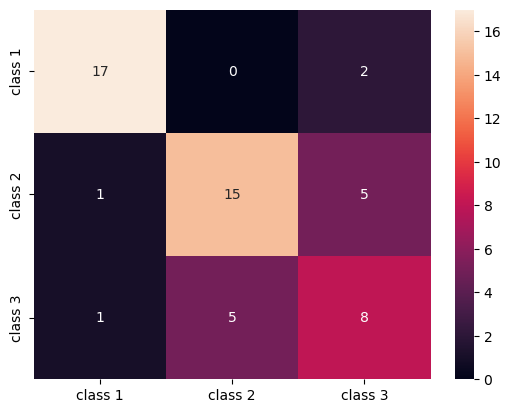

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Importo Seaborn per utitilitzar el mapa de calor 
import seaborn as sns

# Afageixo noms de classes per a una millor interpretacio
classes_names = ['class 1','class 2','class 3']

# Creo matriu de confusió
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Heatmap de Seaborn per visualitzar millor la matriu de confusió
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

La precisió general del model és alta (74%), i per les classes:
- Class 1: el 89% de les mostres son correctament classificades.
- Class 2: el 75% de les mostres son correctament classificades.
- Class 3: el 53% de les mostres son correctament classificades.

La mètrica de recall, també coneguda com la taxa de vertaders positius, s'utilitza per saber quantes valors positius són correctament classificats.
- Class 1: el 89% de les mostres positives son correctament classificades.
- Class 2: el 73% de les mostres positives son correctament classificades.
- Class 3: el 55% de les mostres positives son correctament classificades.

F1-score és una mètrica que combina el precision i el recall, per obtenir un valor molt més objectiu. Valors propers al 1 indiquen un bon equilibri entre precissió i recall. En el nostre cas, la classe 1  i 2 té un f1-score força elevat mentre que la classe 3 esta en el 0.55, millorable.

Els resultats mostren que el KNN ha estat capaç de classificar les 54 dades del test set (X_test) amb una accuracy del 74%, lo qual esta per sobre de la mitjana.


### Classification using Support Vector Machines (SVM)

In [16]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svc = clf.predict(X_test)


In [17]:
# Model Accuracy: how often is the classifier correct?
acc_SVM = metrics.accuracy_score(y_test, y_pred_svc)
print("Accuracy:",acc_SVM )

Accuracy: 0.9814814814814815


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



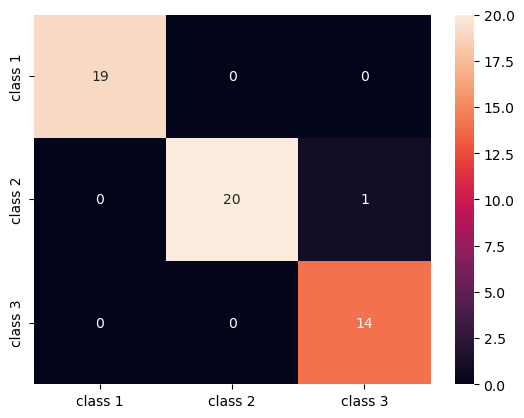

In [18]:
#importing Seaborn's to use the heatmap 
import seaborn as sns

cm_SVM = pd.DataFrame(confusion_matrix(y_test, y_pred_svc), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm_SVM, annot=True, fmt='d');

print(classification_report(y_test, y_pred_svc))

La precisió general (accuracy) del model és alta (98%), i per classe (precision) també: 
- Class 1: el 100% de les mostres son correctament classificades.
- Class 2: el 100% de les mostres son correctament classificades.
- Class 3: el 93% de les mostres son correctament classificades.

Recall:
- Class 1: el 100% de les mostres positives son correctament classificades.
- Class 2: el 95% de les mostres positives son correctament classificades.
- Class 3: el 100% de les mostres positives son correctament classificades.

f1-score:
- Class 1 --> 1 : rendiment perfecte per a la classificació de la classe 1.
- Class 2--> 0.98 la precissió es perfecta, el recall es inferior, pero el rendiment segueix sent molt alt
- Class 3--> 1 : rendiment perfecte per a la classificació de la classe 3.

Els resultats mostren que el SVM ha estat capaç de classificar les 54 dades del test set (X_test) amb una accuracy del 98%, lo qual es un molt bon rendiment.

**Si comparem el rendiment dels dos models mitjançant la accuracy:**

In [19]:
# Crear un DataFrame con los resultados
comp_acc = pd.DataFrame({'Model': ['KNearestNeighbors','Support Vector Machine'],
                        'No Optimitzat': [accKNN,acc_SVM]})

comp_acc.round(3)

,Model,No Optimitzat
0,KNearestNeighbors,0.741
1,Support Vector Machine,0.981


- La puntuació del model KNN no optimizat és baixa (0.741). Sugereix que inicialment sense l'ajust d'hiperparametres el rendiment del model no es tan bo.
- La puntuació del model SVM és molt més alta (0.981) en comparació amb la del model KNN. Ens indica que sense un adjust d'hiperparametres aquest model presenta un rendiment molt bo.

**Procedeixo a comprar les f1-score dels dos models per concluir quin es el que presenta millor rendiment:**

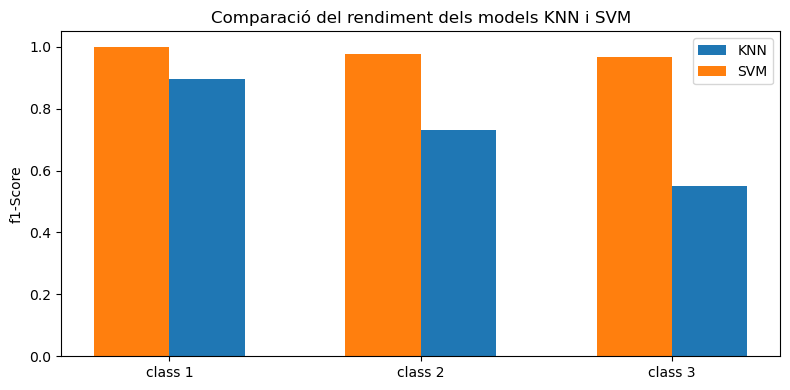

In [20]:
# Calcular f1-score de nou per comparar models. Per no tenir que posar els resultats manualment.
from sklearn.metrics import f1_score
import numpy as np

f1_svc = f1_score(y_test, y_pred_svc, average=None)
f1_knn = f1_score(y_test, y_pred, average=None)

# Grafic de barres
bar_width = 0.3
index = np.arange(len(classes_names))

fig, ax = plt.subplots(figsize=(8, 4))

bar1 = ax.bar(index + bar_width / 2, f1_knn, bar_width, label='KNN')
bar2 = ax.bar(index - bar_width / 2, f1_svc, bar_width, label='SVM')

ax.set_ylabel('f1-Score')
ax.set_title('Comparació del rendiment dels models KNN i SVM')
ax.set_xticks(index)
ax.set_xticklabels(classes_names)
ax.legend()


plt.tight_layout()
plt.show()


- Amb el grafic de barres es pot analitzar i comparar les f1-score dels models de classificacio KNN i SVM. Com es pot comprovar, el model SVM presenta un millor rendiment que el KNN amb un valor mes proper o igual a 1 en les 3 classes, mentre que KNN no presenta unes f1-score tant elevades com el model SVM. 
- Tambe es pot observar com entre classes hi ha un rendiment diferent, sent la classe 1 la que presenta una millor classificacio dels seus registres i a mesura que avançem veiem que el model perd rendiment (la perdua de rendiment es mes marcada en KNN que en SVM), per tant una pitjor classificació dels registres de les ultimes dues classes en els dos models.

## - Exercici 3
**Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.**

In [21]:
# Aquests son els parametres per defecte de KNeighborsClassifier
classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### **Finding the Best K for KNN Classification**

*Aqui el que faré serà buscar la millor K, per a les caracteristiques per defecte del nostre algoritme. Però si realment volem veure quina és la millor combinació de paràmetres aleshores s'ha de fer un Grid Search. Aquest procés el faig més endavant. Deixo aquesta recerca de la millor K per al KNN Classification ja que ja esta feta i es interesant també. Però es pot saltar*

L'objectiu és seleccionar el millor valor de K utilitzant la f1_score. Per fer això, crearé un loop for i executaré models amb un nombre de veïns que va des de 1 fins a X. A cada iteració, calcularé la f1_score i representaré gràficament el nombre de Ks juntament amb el resultat de la f1_score.

Representaré gràficament la f1-score per a (y_pred) del conjunt de proves (X_test) per a tots els valors de K entre 1 i 40.

In [22]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

El següent pas és representar gràficament els valors de f1_score en funció dels valors de K i triar el valor que maximitza la f1_score.

Text(0, 0.5, 'F1 Score')

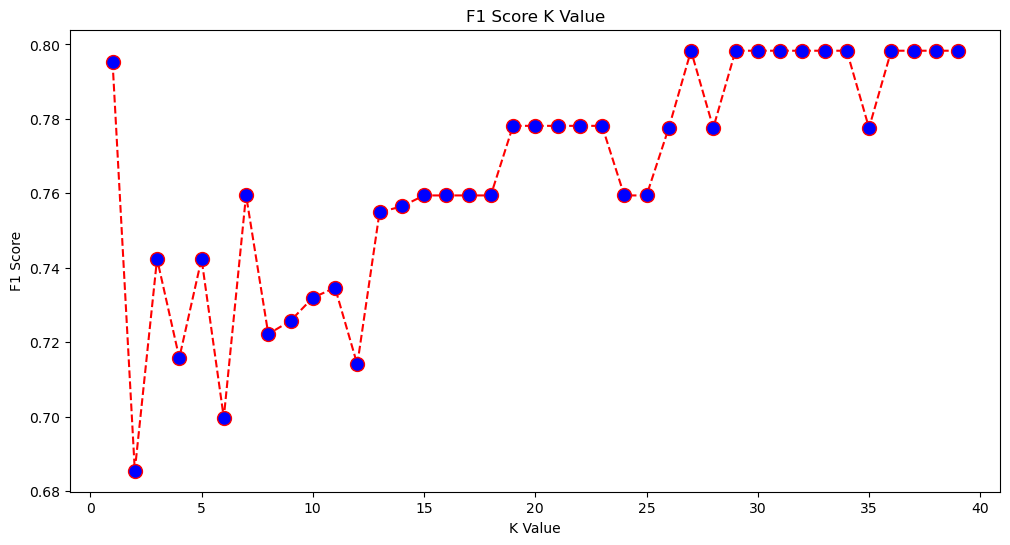

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

Per obtenir la f1-score màxima i l'índex d'aquest, es pot fer també ab l'ús de la funció max() o convertir la llista en una array de NumPy i obtenir l'argmax() (índex de l'element amb el valor més alt):

In [24]:
import numpy as np 

print('El f1-score màxim és:', max(f1s))               
print("L'index és:", np.array(f1s).argmax()) 

El f1-score màxim és: 0.7983181692859113
L'index és: 26


Com que els arrays començen a indexar-se des de 0, el 26è índex correspon a 27 veïns.

Això significa que necessitem 27 veïns per ser capaços de predir el punt amb la f1_score més alta. Amb altres paraules: la f1_score és la més alta quan el valor de K és 27. Ara torno a entrenar el nostre classificador però amb 27 veïns per veure com afecta als resultats:

In [25]:
classifier27 = KNeighborsClassifier(n_neighbors=27)
classifier27.fit(X_train, y_train)
y_pred27 = classifier27.predict(X_test)
print(classification_report(y_test, y_pred27))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.78      0.67      0.72        21
           3       0.59      0.71      0.65        14

    accuracy                           0.80        54
   macro avg       0.79      0.79      0.79        54
weighted avg       0.81      0.80      0.80        54



Observo que les mètriques han millorat amb 27 veïns; ara tenim una precisió del 80% (abans era del 74%) i uns valors més alts de precisio,  recall i f1-score. No obstant això, la f1-score per a les classes 2 i 3 encara és baixa.

### Implementing KNN for Outlier Detection (NO NECESSARI PERÒ HO DEIXO)

Here, we will see how far each of the neighbors is from a data point. For a data point, we will calculate the distance to each of the K-nearest neighbors. To do that, we will import another KNN algorithm from Scikit-learn which is not specific for either regression or classification called simply NearestNeighbors.

In [26]:
from sklearn.neighbors import NearestNeighbors

After importing, we will instantiate a NearestNeighbors class with 27 neighbors. We will then fit our train data and use the kneighbors() method to find our calculated distances for each data point and neighbors indexes:

In [27]:
nbrs = NearestNeighbors(n_neighbors = 27)
nbrs.fit(X_train)
# Distances and indexes of the 27 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

Now we have 27 distances for each data point - the distance between itself and its 27 neighbors, and an index that identifies them. Let's take a peek at the first three results and the shape of the array to visualize this better.

Now, we can continue to calculate the mean of the 27 distances and plot a graph that counts each row on the X-axis and displays each mean distance on the Y-axis:

Text(0, 0.5, 'Mean Distances')

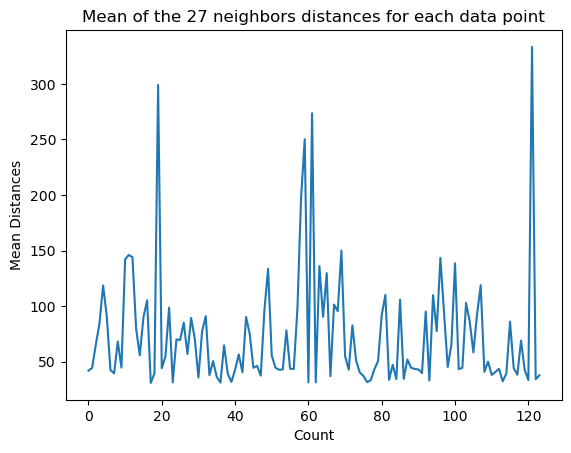

In [28]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 27 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

Notice that there is a part of the graph in which the mean distances have uniform values. That Y-axis point in which the means aren't too high or too low is exactly the point we need to identify to cut off the outlier values.

In this case, it is where the mean distance is 150. Let's plot the graph again with a horizontal dotted line to be able to spot it:

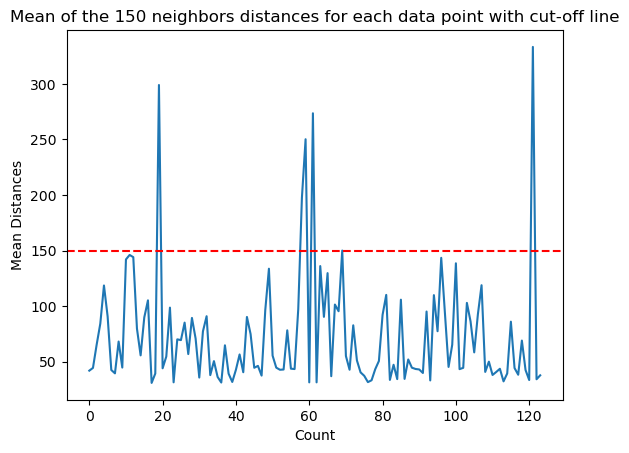

In [29]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 150 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 150, color = 'r', linestyle = '--')

This line marks the mean distance for which above it all values vary. This means that all points with a mean distance above 150 are our outliers. We can find out the indexes of those points using np.where(). This method will output either True or False for each index in regards to the mean above 150 condition:

In [30]:
import numpy as np

# Visually determine cutoff values > 150
outlier_index = np.where(dist_means > 150)
outlier_index

(array([ 19,  58,  59,  61, 121], dtype=int64),)

In [31]:
# Now we have our outlier point indexes. Let's locate them in the dataframe:
outlier_values = df.iloc[outlier_index]
outlier_values

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
19,1,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
58,1,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


Our outlier detection is finished. This is how we spot each data point that deviates from the general data trend. We can see that there are 5 points in our train data that should be further looked at, investigated, maybe treated, or even removed from our data (if they were erroneously input) to improve results. Those points might have resulted from typing errors, mean block values inconsistencies, or even both.

**Ara si que si, procedeixo a buscar els millors parametres per cada model:**

### 3.1. KNN Classifier Best Parameters

In [32]:
#He de crear una nova instancia del model classificador per evitar utilitzar el que ja esta entrenat:
from sklearn.model_selection import GridSearchCV
classifier1 = KNeighborsClassifier()

# Creo un diccionari per definir els hiperparametres a ajustar:
parametres = {'n_neighbors': list(range(1, 40)),
              'p': [1, 2, 3], 
              'metric': ['minkowski', 'manhattan', 'euclidean', 'chebyshev'],
              'leaf_size': [10, 30, 50],
              'weights': ['uniform', 'distance']}

#Confirguro el Grid Search amb el model classifier i els parametres seleccionats  
GS = GridSearchCV(classifier1, parametres) #classifier = KNeighborsClassifier() --> instancia del classificador

#Busqueda en quadricula utilitzant com a dades X i y per seleccionar la millor combinació de paràmetres
GS.fit(X, y.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 30, 50],
                         'metric': ['minkowski', 'manhattan', 'euclidean',
                                    'chebyshev'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})

In [33]:
#Quins son els millors hiperparàmetres
print("Millors hiperparàmetres de KNN Classifier:", GS.best_params_)

Millors hiperparàmetres de KNN Classifier: {'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [34]:
GS.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=1, p=1)

### 3.2. SVM  Best Parameters

In [35]:
clf.get_params() #clf = svm.SVC(kernel='linear')

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [36]:
# Creo un diccionari per definir els hiperparametres a ajustar:
parametres2 = {'C': [1,2,3,10,100,0.01],
 'kernel': ['rbf','linear','poly','sigmoid']}

# Creo una nova instancia de classficacio SVM per evitar utilitzar el model entrenat.
clf2 = svm.SVC(kernel='linear')

# Confirguro el Grid Search amb el model classifier i els parametres seleccionats  
GS2 = GridSearchCV(clf2, parametres2) 

# Busqueda en quadricula utilitzant com a dades X i y per seleccionar la millor combinació de paràmetres
GS2.fit(X, y.ravel())

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 2, 3, 10, 100, 0.01],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [37]:
#Quins son els millors hiperparàmetres
print("Millors hiperparàmetres de SVM:", GS2.best_params_)

Millors hiperparàmetres de SVM: {'C': 2, 'kernel': 'linear'}


In [38]:
GS2.best_estimator_

SVC(C=2, kernel='linear')

## - Exercici 4
**Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.**

Utilitzaré l'eina de validació interna: cross-validation per evaluar el rendimient dels models amb aquests nous hiperparàmetres.

In [39]:
from sklearn.model_selection import cross_val_score

### 4.1. KNN Cross Validation

In [40]:
knn_optimizat = GS.best_estimator_

In [41]:
Cross_Val_KNN = cross_val_score(knn_optimizat, X, y.ravel(), cv=5) # 5 folds

In [42]:
print("El resultat del model KNN optimitzat aplicant CV és:", round(Cross_Val_KNN.mean(),3))

El resultat del model KNN optimitzat aplicant CV és: 0.809


### 4.2. SVM Cross Validation

In [43]:
svm_optimizat = GS2.best_estimator_

In [44]:
Cross_Val_SVM = cross_val_score(svm_optimizat, X, y.ravel(), cv=5) #5 folds

In [45]:
print("El resultat del model KNN optimitzat aplicant CV és:", round(Cross_Val_SVM.mean(),3))

El resultat del model KNN optimitzat aplicant CV és: 0.967


### 4.3. Comparació models KNN i SVM optimitzats amb GridSearch i avaluats amb Cross Validation

In [46]:
# Crear un DataFrame con los resultados
taula = pd.DataFrame({'Model': ['KNearestNeighbors','Support Vector Machine'],
                        'No Optimitzat': [accKNN,acc_SVM],
                        'Optimitzat': [Cross_Val_KNN.mean(), Cross_Val_SVM.mean()]})

taula.round(3)

,Model,No Optimitzat,Optimitzat
0,KNearestNeighbors,0.741,0.809
1,Support Vector Machine,0.981,0.967


Ara hem fet un GridSearch de 5 folds per trobar els millors hiperparametres per cada model en relació al nostre dataset. Després em utilitzat l'eina Cross Validation per avaluar els models. 

**Si analitzem els resultats podem concloure que:**
- El rendiment del model KNN optimitzat ha augmentat un 10% el seu rendiment amb la optimització dels hiperparametres. Per tant, trobar la combinacio adecuada d'hiperparametres ha millorat el rendiment del model!
- El rendiment del model SVM optimitzar ha disminuit lleugerament despres de la optimitzacio dels hiperparametres. Pot ser perque els parametres que he escollit no son els millors per al nostre dataset.

**Conclusió**
La optimització dels hiperparametres amb GridSearch ha tingut un impacte diferent en els dos models. Pel model KNN, la optimitzacio del model ha millorat el seu rendiment mentre que pel model SVM ha disminuit (potser els hiperparametres que he seleccionat per experimentar no son els adequats pel nostre dataset). 

## - Exercici 5
**Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)**

Faré una estandardització de les variables, és a dir,  ajustar totes les variables de manera que tinguin la mateixa escala i rellevància en el nostre model. Hi ha tres eines per estandaritzar dades:
- StandardScaler: Si les variables segueixen una distribució normal.
- MinMaxScaler: Variables que no segueixen una distribució normal però que no tenen outliers. 
- RobustScaler: Variables que no segueixen una distribució normal i que tenen valors atipics (outliers). 

Per això em d'estudiar el comportament de les variables:

In [47]:
from scipy import stats
from scipy.stats import shapiro

for data in df.columns:
    shapiro_test = stats.shapiro(df[data])
    print("La variable", data, "te un p-valor de", "{:.3f}".format(shapiro_test.pvalue))
    if shapiro_test.pvalue > 0.05:
        print("La variable", data, "probablement té una distribució normal.\n")
    else:
        print("La variable", data, "probablement NO té una distribució normal.\n")

La variable Class te un p-valor de 0.000
La variable Class probablement NO té una distribució normal.

La variable Alcohol te un p-valor de 0.020
La variable Alcohol probablement NO té una distribució normal.

La variable Malic acid te un p-valor de 0.000
La variable Malic acid probablement NO té una distribució normal.

La variable Ash te un p-valor de 0.039
La variable Ash probablement NO té una distribució normal.

La variable Alcalinity of ash te un p-valor de 0.264
La variable Alcalinity of ash probablement té una distribució normal.

La variable Magnesium te un p-valor de 0.000
La variable Magnesium probablement NO té una distribució normal.

La variable Total phenols te un p-valor de 0.004
La variable Total phenols probablement NO té una distribució normal.

La variable Flavanoids te un p-valor de 0.000
La variable Flavanoids probablement NO té una distribució normal.

La variable Nonflavanoid phenols te un p-valor de 0.000
La variable Nonflavanoid phenols probablement NO té una

Com que la variable Alcalinity of ash probablement té una distribució normal aplicaré StandardScaler. Per la resta de variables consulto si tenen o no outliers:

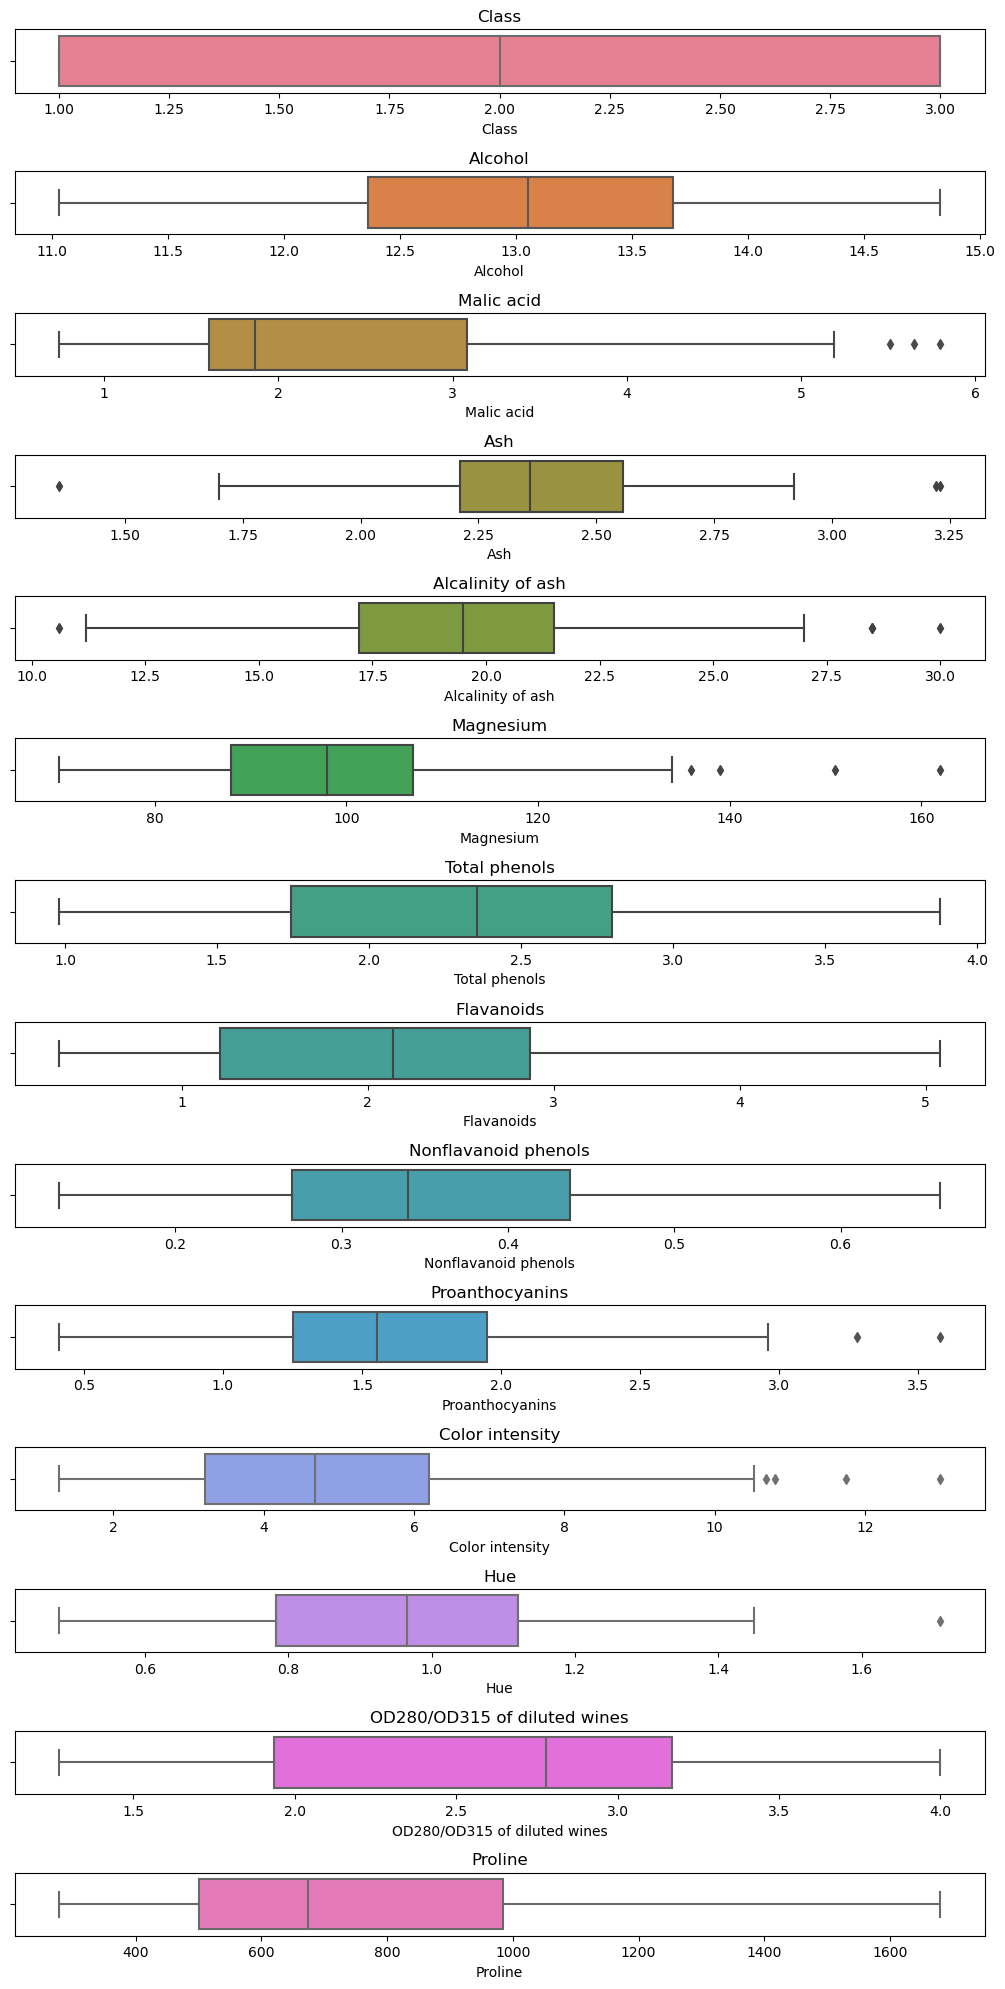

In [48]:
plt.figure(figsize=(20, 20))
palette = sns.color_palette("husl", n_colors=14)

for i, column in enumerate(df.columns):
    plt.subplot(14, 2, 2*i + 1)
    sns.boxplot(x=df[column], orient="h",color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

Les variables Malic acid, Ash, Alcalinity of ash, Magnesium, Proanthocyanins, Color intensity, Hue tenen outliers per tant aplicaré RobustScaler, la resta MinMaxScaler:

In [49]:
# faig una copia del dataframe original
df2=df.copy()

In [50]:
from sklearn import preprocessing 

# StandardScaler
df2[["Alcalinity of ash"]]=preprocessing.StandardScaler().fit_transform(df2[["Alcalinity of ash"]])

# RobustScaler
df2[["Malic acid", "Ash", "Magnesium", "Proanthocyanins", "Color intensity", "Hue"]]=preprocessing.RobustScaler().fit_transform(df2[["Malic acid", "Ash", "Magnesium", "Proanthocyanins", "Color intensity", "Hue"]])

# MinMaxScaler
df2[["Alcohol", "Total phenols","Flavanoids","Nonflavanoid phenols","OD280/OD315 of diluted wines","Proline"]]=preprocessing.MinMaxScaler().fit_transform(df2[["Alcohol", "Total phenols","Flavanoids","Nonflavanoid phenols","OD280/OD315 of diluted wines","Proline"]])

df2.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963
5,1,0.834211,-0.070946,0.258993,-1.289707,0.736842,0.789655,0.643460,0.396226,0.592857,0.691275,0.251852,0.578755,0.835949
6,1,0.884211,0.003378,0.258993,-1.469878,-0.105263,0.524138,0.459916,0.320755,0.607143,0.187919,0.162963,0.846154,0.721826
7,1,0.797368,0.192568,0.719424,-0.569023,1.210526,0.558621,0.457806,0.339623,-0.435714,0.120805,0.281481,0.846154,0.725392
8,1,1.000000,-0.152027,-0.546763,-1.650049,-0.052632,0.627586,0.556962,0.301887,0.607143,0.171141,0.340741,0.578755,0.547076
9,1,0.744737,-0.347973,-0.258993,-1.049479,0.000000,0.689655,0.592827,0.169811,0.421429,0.848993,0.133333,0.835165,0.547076


**Tornem a fer tot el procés:**

### Splitting the Data

In [51]:
# el target parameter es 'Class' (variable dependent) i la resta de parametres son features (variables independents) 
y2 = df2['Class'] # target
X2 = df2.drop(['Class'], axis = 1) # features

# Divisió del conjunt de dades en training set i test set (70% train i 30% de test)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3,random_state=42) 

### Classification using K-Nearest Neighbors (KNN)

In [52]:
classifier2 = KNeighborsClassifier()
classifier2.fit(X_train2, y_train2)

KNeighborsClassifier()

In [53]:
CV_KNN_scaler = cross_val_score(GS.best_estimator_, X2, y2.ravel())

In [54]:
print("El resultat del model KNN optimitzat i escalat aplicant Cross Validation és:", round(CV_KNN_scaler.mean(),6))

El resultat del model KNN optimitzat i escalat aplicant Cross Validation és: 0.960635


### Classification using Support Vector Machines (SVM)

In [55]:
#Create a svm Classifier
clf2 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf2.fit(X_train2, y_train2)

SVC(kernel='linear')

In [56]:
CV_SVM_scaled = cross_val_score(GS2.best_estimator_, X2, y2.ravel())

print("El resultat del model SVM optimitzat i escalat aplicant Cross Validation és:", round(CV_SVM_scaled.mean(),6))

El resultat del model SVM optimitzat i escalat aplicant Cross Validation és: 0.943968


## Comparació dels resultats

In [57]:
resultats = pd.DataFrame({'Model': ['KNearestNeighbors','Support Vector Machine'],
                        'No Optimitzat': [accKNN,acc_SVM],
                        'Optimitzat': [round(Cross_Val_KNN.mean(),3), round(Cross_Val_SVM.mean(),3)],
                        'Optimitzat i Escalat': [round(CV_KNN_scaler.mean(),6), round(CV_SVM_scaled.mean(),6)],   
                        })

resultats.round(3)

,Model,No Optimitzat,Optimitzat,Optimitzat i Escalat
0,KNearestNeighbors,0.741,0.809,0.961
1,Support Vector Machine,0.981,0.967,0.944


La taula mostra els resultats del rendiment de cada model:
- Model No optimitzat: model amb els hiperparmetres per defecte.
- Model Optimitzat: model amb els millors hiperparametres segons GridSearch i aplicant Cross Validation per avaluar el model.
- Model Optimitzat i Escalat: model amb els millors hiperparametres segons GridSearch, aplicant Cross Validation i amb les dades escalades.

**Avaluació dels resultats:**

- Pel que fa al model KNN, hi ha una millora del 10% quan s'execut el model amb els millors hiperparametres. Mentre que en el SVM, hi ha una reducció del rendiment del model. 

- Pel que fa al model optimitzat i escalat de KNN, hi trobem una millora d'un 30% aproximadament respecte al no optimitzat i d'un 19% respecte al optimitzat.

- El model Optimitzat i Escalat de SVM, no presenta cap millora sinò una disminució del rendiment amb el scaling.

**Conclusions:**
- El model KNN millora si s'optimitza amb el GridSearch per buscar els millors parametres i encara millora molt més si se li fa un scaling.
- En el model SVM tot i que la seva puntuació és molt alta, no presenta millores amb una cerca dels millors hiperparametres ni tampoc sota el scaling.
- Per tant, la optimitzacio dels hiperparametres i escalat ha tingut diferents impactes en els dos models. Per al model KNN, ha suposat una millora total del 30% del rendiment respecte al model no optimitzat. Però, en SVM la optimització ha suposat una perdua lleugera del seu rendiment tant amb la optimitzacio i amb el escalat. Una de les raons per les quals crec que el model SVM no ha millorat ha estat per que els hiperparametres seleccionats en el GridSearch no eren els suficients com per trobar la millor combinació, per tant, remarcar la importancia d'experimentar amb diferents configuracions per tal de trobar la combinació optima per a un conjunt de dades especific.
